In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('C:/Users/Nikose/Desktop/Time Series/Train.csv')

data.head()
 
data.dtypes


ID           int64
Datetime    object
Count        int64
dtype: object

In [3]:
data.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y %H:%M')
data = pd.read_csv('C:/Users/Nikose/Desktop/Time Series/Train.csv', parse_dates=['Datetime'], index_col='Datetime',date_parser=dateparse)
data.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [5]:
data.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [6]:
ts = data['Count'] 

In [7]:
ts.head(10)

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
Name: Count, dtype: int64

In [8]:
ts['2014-01-01']

Datetime
2014-01-01 00:00:00    196
2014-01-01 01:00:00    174
2014-01-01 02:00:00    134
2014-01-01 03:00:00    116
2014-01-01 04:00:00     74
2014-01-01 05:00:00     72
2014-01-01 06:00:00     82
2014-01-01 07:00:00    112
2014-01-01 08:00:00    142
2014-01-01 09:00:00    144
2014-01-01 10:00:00    210
2014-01-01 11:00:00    236
2014-01-01 12:00:00    276
2014-01-01 13:00:00    238
2014-01-01 14:00:00    216
2014-01-01 15:00:00    264
2014-01-01 16:00:00    252
2014-01-01 17:00:00    250
2014-01-01 18:00:00    240
2014-01-01 19:00:00    230
2014-01-01 20:00:00    198
2014-01-01 21:00:00    200
2014-01-01 22:00:00    238
2014-01-01 23:00:00    222
Name: Count, dtype: int64

In [9]:
from datetime import datetime
ts[datetime(2014,1,1)]

196

In [10]:
#1. Specify the entire range:
ts['2014-01-01':'2014-05-01'].sum()

575746

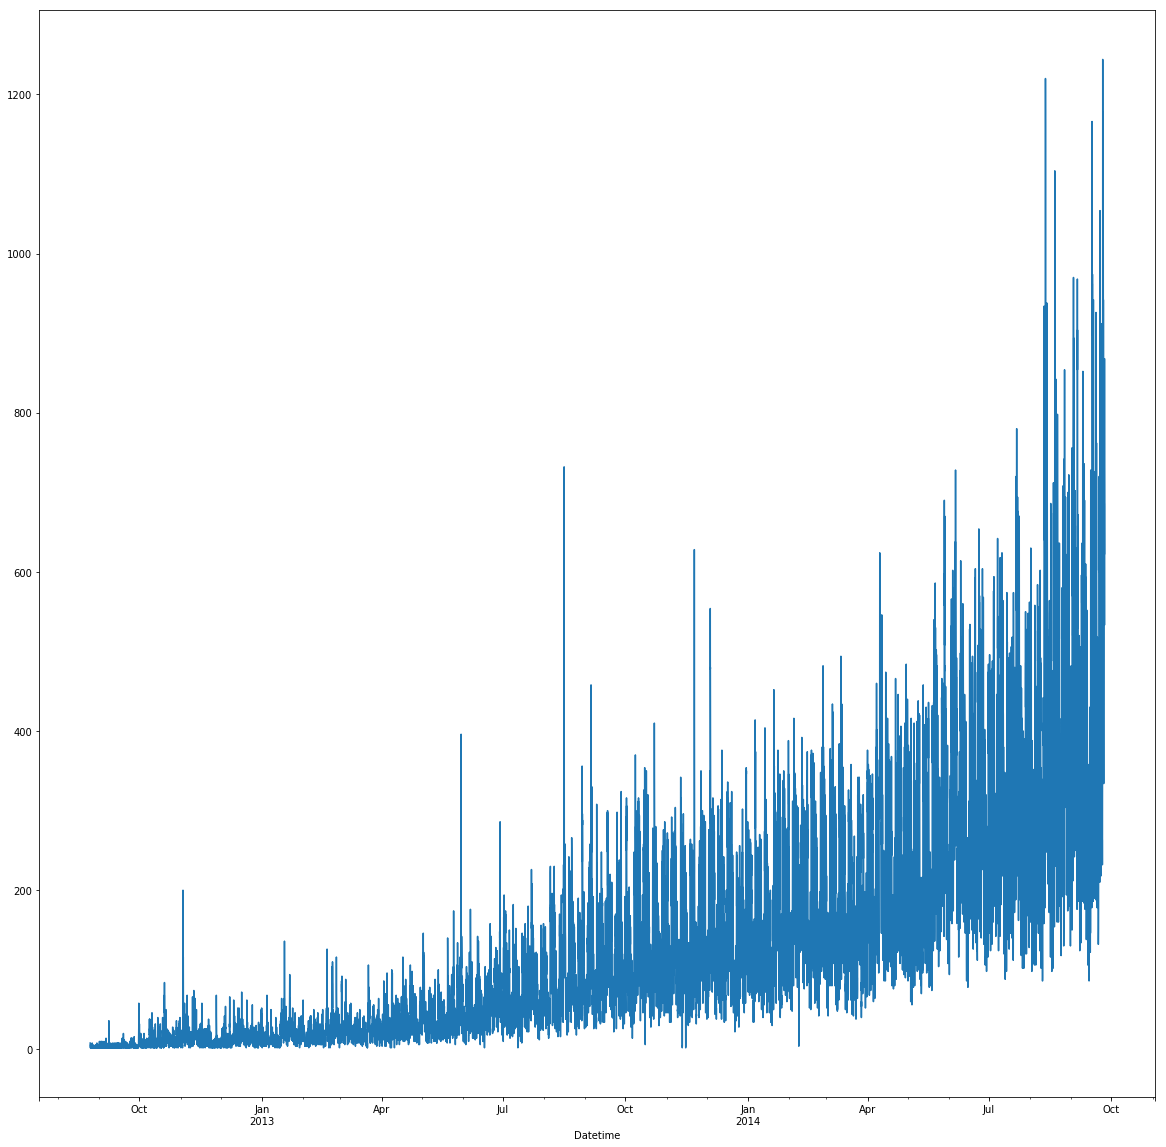

In [11]:
ts.plot(figsize=(20, 20))

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    dfoutput
    

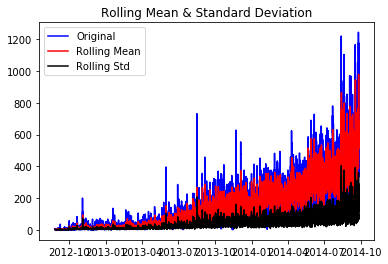

In [14]:
test_stationarity(ts)

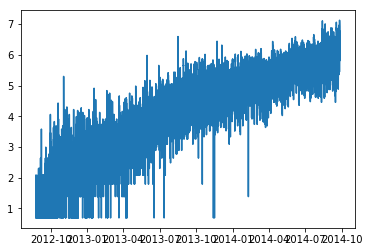

In [15]:
ts_log = np.log(ts)
plt.plot(ts_log)

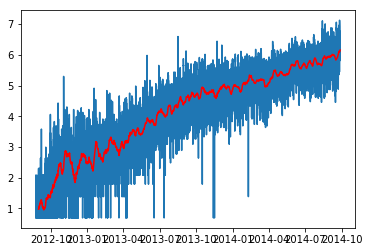

In [21]:
moving_avg = ts_log.rolling(168).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

Datetime
2012-08-25 00:00:00   NaN
2012-08-25 01:00:00   NaN
2012-08-25 02:00:00   NaN
2012-08-25 03:00:00   NaN
2012-08-25 04:00:00   NaN
2012-08-25 05:00:00   NaN
2012-08-25 06:00:00   NaN
2012-08-25 07:00:00   NaN
2012-08-25 08:00:00   NaN
2012-08-25 09:00:00   NaN
2012-08-25 10:00:00   NaN
2012-08-25 11:00:00   NaN
Name: Count, dtype: float64

In [23]:
ts_log_moving_avg_diff.head(168)

Datetime
2012-08-25 00:00:00         NaN
2012-08-25 01:00:00         NaN
2012-08-25 02:00:00         NaN
2012-08-25 03:00:00         NaN
2012-08-25 04:00:00         NaN
2012-08-25 05:00:00         NaN
2012-08-25 06:00:00         NaN
2012-08-25 07:00:00         NaN
2012-08-25 08:00:00         NaN
2012-08-25 09:00:00         NaN
2012-08-25 10:00:00         NaN
2012-08-25 11:00:00         NaN
2012-08-25 12:00:00         NaN
2012-08-25 13:00:00         NaN
2012-08-25 14:00:00         NaN
2012-08-25 15:00:00         NaN
2012-08-25 16:00:00         NaN
2012-08-25 17:00:00         NaN
2012-08-25 18:00:00         NaN
2012-08-25 19:00:00         NaN
2012-08-25 20:00:00         NaN
2012-08-25 21:00:00         NaN
2012-08-25 22:00:00         NaN
2012-08-25 23:00:00         NaN
2012-08-26 00:00:00         NaN
2012-08-26 01:00:00         NaN
2012-08-26 02:00:00         NaN
2012-08-26 03:00:00         NaN
2012-08-26 04:00:00         NaN
2012-08-26 05:00:00         NaN
                         ...   

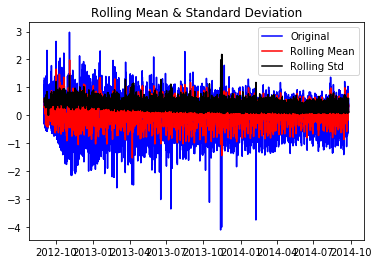

In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [31]:
expwighted_avg = pd.ewma(ts_log, halflife=168)
expwighted_avg.index.name = 'date'
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

AttributeError: module 'pandas' has no attribute 'ewma'

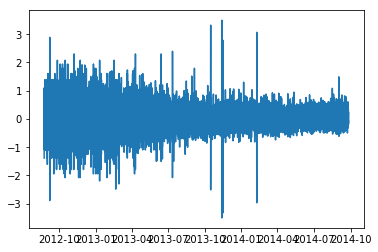

In [32]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

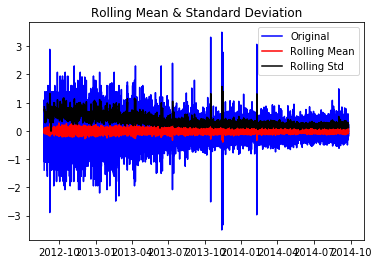

In [33]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

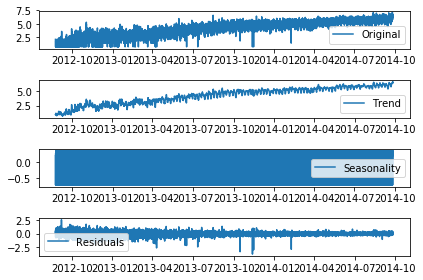

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

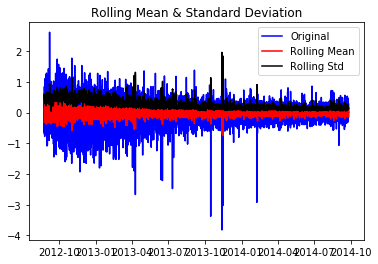

In [35]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [36]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [37]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

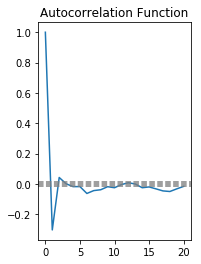

In [38]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

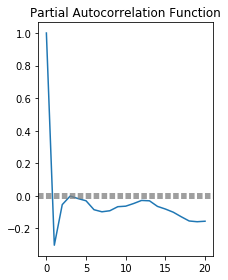

In [39]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [41]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 2710.3534')

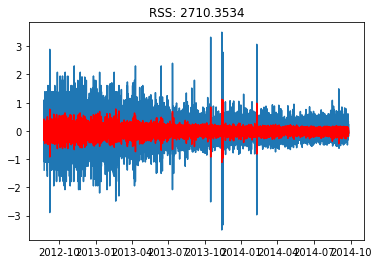

In [44]:
model = ARIMA(ts_log, order=(, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 2710.3534')

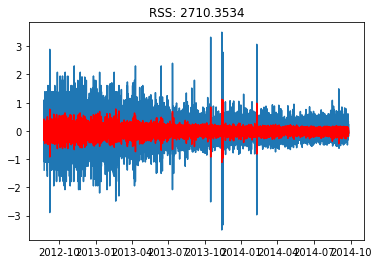

In [45]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 2710.6481')

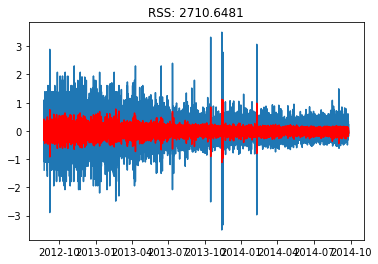

In [46]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nikose\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 2528.4698')

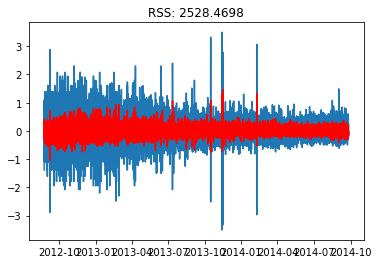

In [47]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [48]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Datetime
2012-08-25 01:00:00    0.000278
2012-08-25 02:00:00    0.420316
2012-08-25 03:00:00   -0.267648
2012-08-25 04:00:00    0.364019
2012-08-25 05:00:00    0.088420
dtype: float64

In [51]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Datetime
2012-08-25 01:00:00    0.000278
2012-08-25 02:00:00    0.420594
2012-08-25 03:00:00    0.152947
2012-08-25 04:00:00    0.516966
2012-08-25 05:00:00    0.605385
dtype: float64

In [52]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Nikose\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    2.079720
2012-08-25 02:00:00    2.500036
2012-08-25 03:00:00    2.232388
2012-08-25 04:00:00    2.596407
dtype: float64

Text(0.5,1,'RMSE: 182213.0213')

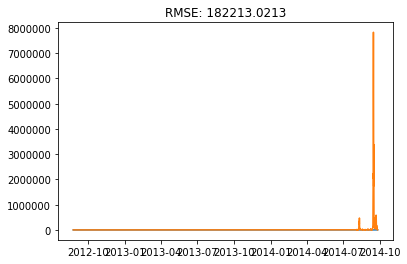

In [53]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))